# 🌟 Day 60 Challenge 🌟

Today's challenge is an events countdown timer.


### Task:
Your program should:
1. Automatically work out today's date.
2. Prompt the user to input the name and date of their event (year, month, and day).
3. Work out the number of days until the event and output it.
4. If the event is happening today, insert some party emojis. 🎉🎊
5. If the event was in the past, add sad face emojis and tell the user how many days ago it was. 😢


### Example:

🌟 **Event Countdown Timer** 🌟

```plaintext
Input the event > Nan's 100th birthday

Input the year > 2022

Input the month > 10

Input the day > 16

🎉🎉 Nan's 100th birthday is today! 🎉🎉
```

### Hints:
1. Subtract today's date from the delta.
2. What type of number will you get if the date has passed?

In [3]:
import datetime
import os

# Function to clear the screen
def clear_screen():
    os.system('cls' if os.name == 'nt' else 'clear')

# Function to get the event details from the user
def get_event_details():
    event_name = input("Event Name: ").strip()
    while True:
        try:
            day = int(input("Day: "))
            month = int(input("Month: "))
            year = int(input("Year: "))
            event_date = datetime.date(year, month, day)
            return event_name, event_date
        except ValueError:
            print("Invalid date. Please enter a valid date.")

# Main function to calculate the event countdown
def main():
    clear_screen()
    today = datetime.date.today()
    print("EVENT COUNTDOWN")
    
    event_name, event_date = get_event_details()
    
    difference = (event_date - today).days
    
    if difference > 0:
        print(f"{difference} days to go until {event_name}")
    elif difference < 0:
        print(f"😭😭😭😭😭😭😭 You missed {event_name} by {-difference} days!")
    else:
        print(f"🥳🥳🥳🥳🥳🥳🥳 {event_name} is today!")

# Run the main function
if __name__ == "__main__":
    main()

EVENT COUNTDOWN


3 days to go until New years' eve


# 👈 Day 61 Challenge 👈

Someone is **wrong** on the Internet!

Today, we're going to fix the major malfunction with social media - other people and their stupid opinions - and create a Twitter for one!

I know you like to hear the sound of your own voice!


## Your program should:
1. Display a menu - Add or View tweets.
2. **'Add'** should:

   i. Get the tweet input.  
   ii. Store it to the database with the current timestamp as the key value.  
3. **'View'** should:

   i. Show the tweets in reverse chronological order.  
   ii. Show 10 tweets at a time.  
   iii. Prompt the user to show another 10 tweets (yes or no).  
   iv. A 'no' choice goes back to the menu.  


### Timestamp Code:

```python
timestamp = datetime.datetime.now()
```

### Hints:
1. Use the ```datetime``` library to get the current timestamp.
2. Use the ```os``` library to clear the console between each 10 tweets shown.

In [1]:
import shelve
import datetime
import os
import time
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()
data_path = os.getenv('DATA_PATH')

# Define the path to the database file
db_path = os.path.join(data_path, 'databases/tweets_db')

def add_tweet(db):
    """
    Prompt the user to input a tweet and store it in the database with a timestamp.
    """
    # Get the tweet from the user
    tweet = input("🐥 > ")
    
    # Get the current timestamp
    timestamp = datetime.datetime.now()
    
    # Create a unique key for the tweet using the timestamp
    key = f"mes{timestamp}"
    
    # Store the tweet and timestamp in the database
    db[key] = (tweet, timestamp)
    
    # Wait for a second and clear the console
    time.sleep(1)
    clear_console()
    
    # Show all tweets after adding a new one
    view_tweets(db)

def view_tweets(db):
    """
    Retrieve and display tweets from the database in reverse chronological order.
    """
    # Get all keys that start with "mes" (tweets)
    keys = [key for key in db.keys() if key.startswith("mes")]
    
    # Check if there are no tweets
    if not keys:
        print("No tweets available.")
        time.sleep(1)
        clear_console()
        return
    
    # Sort the keys in reverse chronological order
    keys.sort(reverse=True)
    
    counter = 0
    for key in keys:
        # Retrieve the tweet and timestamp
        value = db[key]
        if isinstance(value, tuple) and len(value) == 2:
            tweet, timestamp = value
            # Format the timestamp without microseconds
            timestamp_str = timestamp.strftime("%Y-%m-%d %H:%M:%S")
            # Print each tweet with its timestamp
            print(f"{timestamp_str} {tweet}")
            print()
        else:
            # Remove entries without a timestamp
            del db[key]
        
        # Wait for a short time before displaying the next tweet
        time.sleep(0.3)
        
        counter += 1
        if counter % 10 == 0:
            # After every 10 tweets, ask the user if they want to continue
            carry_on = input("Next 10? (yes/no): ")
            if carry_on.lower() == "no":
                break
    
    # Wait for a second and clear the console
    time.sleep(1)
    clear_console()

def clear_console():
    """
    Clear the console screen.
    """
    # Use the appropriate command to clear the console based on the operating system
    os.system("cls" if os.name == "nt" else "clear")

def main():
    """
    Main function to run the Tweeter application.
    """
    # Ensure the data directory exists
    os.makedirs(data_path, exist_ok=True)
    
    # Open the shelve database
    with shelve.open(db_path) as db:
        while True:
            # Display the menu
            print("Tweeter")
            menu = input("1: Add Tweet\n2: View Tweets\n3: Exit\n> ")
            
            # Handle the user's menu choice
            if menu == "1":
                add_tweet(db)
            elif menu == "2":
                view_tweets(db)
            elif menu == "3":
                print("Exiting Tweeter. Goodbye!")
                break
            else:
                # Handle invalid menu choices
                print("Invalid option. Please choose 1, 2, or 3.")
                time.sleep(1)
                clear_console()

if __name__ == "__main__":
    main()

Tweeter


2024-12-28 14:12:14 nice

2024-12-28 14:12:04 I am fine

2024-12-28 14:11:51 how are you?

Tweeter
2024-12-28 14:21:58 guapi

2024-12-28 14:12:14 nice

2024-12-28 14:12:04 I am fine

2024-12-28 14:11:51 how are you?

Tweeter
Exiting Tweeter. Goodbye!


# 👈 Day 62 Challenge 👈

Look out, Big Brother! Today is a project day, and you are going to build your own private diary to keep your innermost thoughts secret from the world.


## Your diary should:
1. **Set an access password.**
2. **Prompt the user to type in a password.**
   - If they don’t get the password right, exit the program.
3. **If they get it right:**
   - Enter the main menu, which gives 'Add' or 'View' diary entries.
4. **Choosing 'add' should:**
   i. Prompt the user to type the entry and store it in the database with the timestamp as the key.  
5. **Choosing 'view' should:**
   i. Show the user the previous (most recent) entry.  
   ii. They can then choose to see the next previous entry working backwards until they get to the end. Or exit back to the menu.  


🎉 **Extra points:**  
- Add a feature that allows the user to view an entry from an exact date.


### Hints:
1. Use `if passwordEntered != correctPassword` to verify the user.
2. Use `os.clear()` to clear the screen between each entry viewed.
3. **Extra points:** Compare the date entered to the timestamp and only show if `date entered >= timestamp`.


In [10]:
# Import all functions from utils.py
from utils import *

# Ensure the data directory exists
os.makedirs('data', exist_ok=True)

# Use the clear_console function
clear_console()

# Use the print_with_delay function
print_with_delay("This is a delayed message.", delay=0.1)

# Use the roll_dice function
dice_result = roll_dice()
print(f"Dice roll result: {dice_result}")

# Use the colorize function
colored_text = colorize("This is a colored text.", "green")
print(colored_text)

# Use the load_data function
data = load_data("example.txt")
print(f"Loaded data: {data}")

# Use the save_data function
save_data("example.txt", ["Line 1", "Line 2", "Line 3"])
print("Data saved to example.txt")

# Use the timestamp function
current_timestamp = timestamp()
print(f"Current timestamp: {current_timestamp}")

# Use the pretty_print function
pretty_print("Title", "This is the content of the box.", width=50)

# Use the generate_random_insult function
insult = generate_random_insult()
print(f"Random insult: {insult}")

No diary entries available.
No diary entries available.
2024-12-28 14:35:57
guapi

2024-12-28 14:35:57
guapi

Exiting Diary. Goodbye!


# 👈 Day 63 Challenge 👈

Today's challenge is to become your own librarian. Oook! 🦍


## Task:
In the real world, programmers usually keep a library of their most useful subroutines just like this. You're going to curate your own library with these subroutines:

1. **Go back through your programs and choose some subroutines that you've used _a lot._**
   - Perhaps it was your dice roller.
   - Could be your prettyPrint.
   - Maybe it was your 'generate random baldy insult' subroutine. Whatever. Find them.

2. **Create a new file** that contains all your best subroutines.

3. **Import this file into your `main.py` and call a few** to show that it works.


### Hints:
- You're better than this by now! No hints today, amigos! Good luck! 🍀


In [1]:
# Import all functions from utils.py
from utils import *

# Ensure the data directory exists
os.makedirs('data', exist_ok=True)

# Use the clear_console function
clear_console()

# Use the print_with_delay function
print_with_delay("This is a delayed message.", delay=0.1)

# Use the roll_dice function
dice_result = roll_dice()
print(f"Dice roll result: {dice_result}")

# Use the colorize function
colored_text = colorize("This is a colored text.", "green")
print(colored_text)

# Use the colorize function
colored_text = colorize("This is a multicolored text.")
print(colored_text)

# Use the load_data function
data = load_data("example.txt")
print(f"Loaded data: {data}")

# Use the save_data function
save_data("example.txt", ["Line 1", "Line 2", "Line 3"])
print("Data saved to example.txt")

# Use the timestamp function
current_timestamp = timestamp()
print(f"Current timestamp: {current_timestamp}")

# Use the pretty_print function
pretty_print("Title", "This is the content of the box.", width=50)

# Use the generate_random_insult function
insult = generate_random_insult()
print(f"Random insult: {insult}")

This is a delayed message.
Dice roll result: 2
This is a colored text.
This is a multicolored text.
Loaded data: ['Line 1', 'Line 2', 'Line 3']
Data saved to example.txt
Current timestamp: 2024-12-28 19:50:44
                      Title                       
This is the content of the box.
Random insult: You're not stupid; you just have bad luck thinking.


# OOP

Object-Oriented Programming (OOP) is a **programming paradigm** (a way of thinking about how to solve a problem) that is based on **classes** and **objects**, which store all of their data and behaviors inside them.

You can think of a class like a cookie cutter, or template. It has pre-defined characteristics (shape, size, etc.).

Objects are like the cookies created using the cutter. They all get the same size and shape, but then we can personalize each one (sprinkles, icing, etc.).

Some programming languages, like Java, are entirely based on OOP. So all you Java coders will be used to this way of thinking.

If you're a Python programmer, then this may take some getting used to, but stay with it.

This approach lets us create a template for something like an enemy in a video game, and then use that template to create, say, 20 enemies. Instead of having to code each one individually.

It's very powerful for large-scale projects, but we're going to start small.


## Classes

👉 Let's create a **template**, known as a class. Our theme is animals. Our class will contain all the characteristics (think variables) that animals have in common.

Remember that this is just a template. All the characteristics are set to `'None'` in the template and we will customize these values when we use the template to create (**instantiate**) each animal. The values will be passed as arguments into the `__init__` subroutine inside each animal object.

We also want to create a subroutine called `init` (short for initialization) which tells the class what to do when it is used to create each instance of an animal.

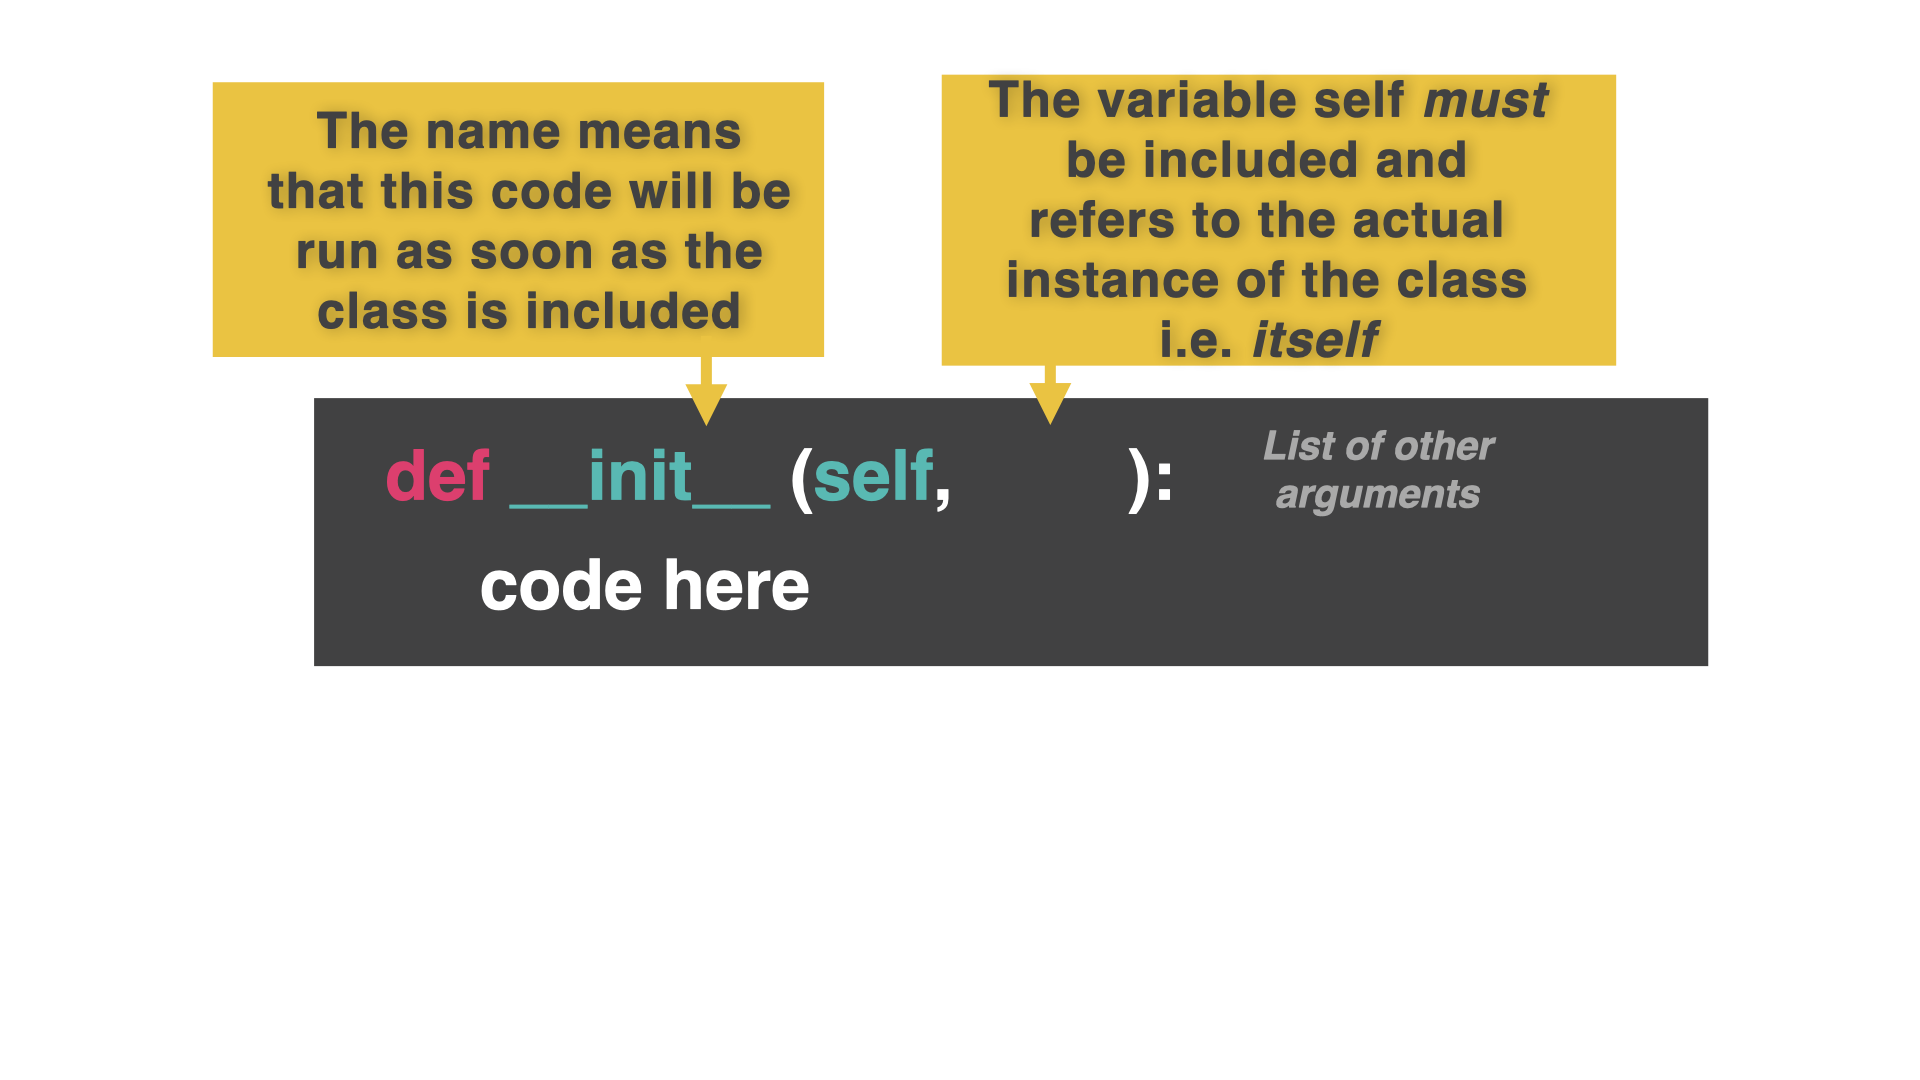

```python
class Animal:
    species = None
    name = None
    sound = None
    # Sets the characteristics

    def __init__(self, name, species, sound):
        self.name = name
        self.species = species
        self.sound = sound
        # 'self' means 'this object'
        # This code sets the name, species, and sound of each object
        # to the arguments passed in when it is created (instantiated).
```

## Instantiation

Instantiation means **using the template to create an object**. Think of it as pressing the cutter into the dough to make a cookie.

👉 Let's instantiate a dog object.

```python
class Animal:
    species = None
    name = None
    sound = None
    # Sets the characteristics

    def __init__(self, name, species, sound):
        self.name = name
        self.species = species
        self.sound = sound
        # 'self' means 'this object'
        # This code sets the name, species, and sound of each object
        # to the arguments passed in when it is created (instantiated).

# THE NEW BIT #####

dog = Animal("Brian", "Canine", "Woof") 
# Use the Animal class to create a new object called 'dog' with the following parameters.
```
👉 Now let's output the dog's name.

```python
class Animal:
    species = None
    name = None
    sound = None
    # Sets the characteristics

    def __init__(self, name, species, sound):
        self.name = name
        self.species = species
        self.sound = sound

dog = Animal("Brian", "Canine", "Woof")

#### THE NEW BIT ###########
print(dog.name)
```
👉 I can use the `Animal()` class to create as many different animals as I want.

```python
class Animal:
    species = None
    name = None
    sound = None
    # Sets the characteristics

    def __init__(self, name, species, sound):
        self.name = name
        self.species = species
        self.sound = sound

dog = Animal("Brian", "Canine", "Woof")
print(dog.name)

#### THE NEW BIT ###########
cow = Animal("Ermintrude", "Bo Taurus", "Moo")
print(cow.sound)
```


## More Methods

Subroutines inside an object are called methods.

👉 Let's create a `talk` method inside the `Animal` class. This can then be used by both our `dog` and `cow` objects.

```python
class Animal:
    species = None
    name = None
    sound = None
    # Sets the characteristics

    def __init__(self, name, species, sound):
        self.name = name
        self.species = species
        self.sound = sound

    def talk(self):
        print(f"{self.name} says {self.sound}")
```
👉 Now I can use the `talk()` method for each object.

```python
class Animal:
    species = None
    name = None
    sound = None
    # Sets the characteristics

    def __init__(self, name, species, sound):
        self.name = name
        self.species = species
        self.sound = sound

    def talk(self):
        print(f"{self.name} says {self.sound}")

# 'self' means 'use the identifier given to the object that is accessing 
# this method'. So if I use it with dog it will become 'dog.talk()' etc.

dog = Animal("Brian", "Canine", "Woof")
dog.talk()

cow = Animal("Ermintrude", "Bo Taurus", "Moo")
cow.talk()
```

# Inheritance

Inheritance means that we can take the template from `Animal` and break it down into sub-classes that use all the attributes and methods from that class, but also add their own attributes.

This is useful when we're thinking about animals as we can start breaking the animal kingdom apart by species.

When I create the sub-class, I use the name of its parent class as a parameter. This means "get all the features of `Animal` and use them here too."

Here, I'm creating a sub-class of `Bird`, which inherits from `Animal`.

👉 I can then create the "bird-specific" features inside the bird sub-class.

```python
class Animal:
    species = None
    name = None
    sound = None
    # Sets the characteristics

    def __init__(self, name, species, sound):
        self.name = name
        self.species = species
        self.sound = sound

    def talk(self):
        print(f"{self.name} says {self.sound}")

##### The New Bit ##########

class Bird(Animal):

    def __init__(self):
        self.name = "Bird"
        self.species = "Avian"
        self.sound = "Tweet"

# This automatically sets the information for each bird when it is created.

polly = Bird()  # Instantiates a new bird which gets its details from the sub-class.
polly.talk()  # Polly uses the `talk()` method from the Animal class.
```
👉 Let's add a specific color to the bird class.

```python
class Bird(Animal):

    def __init__(self, color):
        self.name = "Bird"
        self.species = "Avian"
        self.sound = "Tweet"
        self.color = color  # Only applies to the bird subclass.

polly = Bird("Green")  # Sets Polly's color to 'Green'.
polly.talk()
print(polly.color)  # Prints Polly's color.
```

We can use inheritance to create a generic class (like 'character') and then sub-divide it into different types (player, enemy, boss etc.)

## 🌟 Day 64 Challenge 🌟

In today's project, create classes to represent jobs.

Your program should:
1. Create a generic `Job` class.
2. The `__init__` method will store the details for name, salary, and hours worked.
3. `Job` will have another method that prints those details nicely.
4. Create two sub-classes from `Job`: `Doctor` and `Teacher`.
5. The `Doctor` subclass should also include `speciality` and `years of experience`.
6. The `Teacher` subclass should also include `subject` and `position`.
7. The print functions for each subclass should print this extra data.
8. Instantiate a lawyer, a computer science teacher, and a pediatric doctor (this is a doctor for children) with 7 years of experience.
9. Output the information for each job.

### Example:
```
🌟Jobs Jobs Jobs!🌟

Job type: Lawyer
Salary: $ Squillions
Hours worked: 60

Job type: Teacher
Salary: $ Nowhere near enough
Hours worked: All of them
Subject: Computer Science
Position: Classroom Teacher

Job type: Doctor
Salary: $ Doing very nicely thank you
Hours worked: 50
Speciality: Pediatric Consultant
Years of Experience: 7
```

### 💡 Hints

- Copy the `print` method to each of your sub-classes and customize it for each one.
- Don't worry about keeping the same method name. The one in the sub-class will override the one in the `Job` main class.


In [5]:
class Job:
    """
    A class to represent a generic job.
    """
    def __init__(self, name, salary, hours_worked):
        """
        Initialize the job with name, salary, and hours worked.
        """
        self.name = name
        self.salary = salary
        self.hours_worked = hours_worked

    def print_details(self):
        """
        Print the details of the job.
        """
        print("== JOB ==")
        print(f"Name: {self.name}")
        print(f"Salary: {self.salary}")
        print(f"Hours Worked: {self.hours_worked}")


class Doctor(Job):
    """
    A class to represent a doctor, inheriting from Job.
    """
    def __init__(self, salary, hours_worked, experience, specialty):
        """
        Initialize the doctor with salary, hours worked, experience, and specialty.
        """
        super().__init__("Doctor", salary, hours_worked)
        self.experience = experience
        self.specialty = specialty

    def print_details(self):
        """
        Print the details of the doctor.
        """
        super().print_details()
        print(f"Experience: {self.experience} years")
        print(f"Specialty: {self.specialty}")


class Teacher(Job):
    """
    A class to represent a teacher, inheriting from Job.
    """
    def __init__(self, salary, hours_worked, subject, position):
        """
        Initialize the teacher with salary, hours worked, subject, and position.
        """
        super().__init__("Teacher", salary, hours_worked)
        self.subject = subject
        self.position = position

    def print_details(self):
        """
        Print the details of the teacher.
        """
        super().print_details()
        print(f"Subject: {self.subject}")
        print(f"Position: {self.position}")


# Create instances of each job type and print their details
lawyer = Job("Lawyer", "$100,000", "40")
lawyer.print_details()

print()  # Add a blank line between different job types

doctor = Doctor("$120,000", "48", "7", "Pediatric Consultant")
doctor.print_details()

print()  # Add a blank line between different job types

teacher = Teacher("$50,000", "48+", "Computer Science", "Assistant Principal")
teacher.print_details()

== JOB ==
Name: Lawyer
Salary: $100,000
Hours Worked: 40

== JOB ==
Name: Doctor
Salary: $120,000
Hours Worked: 48
Experience: 7 years
Specialty: Pediatric Consultant

== JOB ==
Name: Teacher
Salary: $50,000
Hours Worked: 48+
Subject: Computer Science
Position: Assistant Principal


## 🏆 Day 65 Challenge

Today is a project day! You're going to use what you've learned about OOP (on Day 64) to store characters for my video game.

1. My game needs to have a character with a name, health, and magic points.
2. It needs to have a value setup when it is initialized.
3. It needs a method to output this data.
4. There should also be a sub-class `Player` which inherits from `Character` and also has a number of lives.
5. `Player` should also have an `am_I_alive?` method which checks the player status and reports back yes or no.
6. There should also be two enemy sub-classes with additional `type` and `strength`:
   - **Vampire** with a `day/night` tracker.
   - **Orc** with a `speed` attribute.
7. Instantiate one player, two vampires, and three orcs. You choose their names.
8. Print out their values.

### Example:

```plaintext
🌟 Generic RPG 🌟

Player
Name: David
Health: 100
Magic Points: 50
Lives: 3
Alive?: Yes

Name: Boris
Health: 45
Magic Points: 78
Type: Vampire
Strength: 3
Day/Night?: Night

Name: Ruth
Health: 70
Magic Points: 10
Type: Vampire
Strength: 2
Day/Night?: Day

Name: Bill
Health: 60
Magic Points: 5
Type: Orc
Strength: 75
Speed: 90

Name: Ted
Health: 35
Magic Points: 40
Type: Orc
Strength: 88
Speed: 45

Name: Stanton
Health: 30
Magic Points: 40
Type: Orc
Strength: 49
Speed: 90
```

### Hints:
You only need to inherit from the class directly above. So orc only needs to inherit from enemy, for example.

In [9]:
# Base class for all characters
class Character:
    name = None
    health = 100
    mp = 100

    def __init__(self, name):
        self.name = name

    def print_details(self):
        """Print the character's details."""
        print(f"{self.name}\tHP: {self.health}\tMP: {self.mp}")

    def set_stats(self, health, mp):
        """Set the character's health and magic points."""
        self.health = health
        self.mp = mp


# Class for player characters
class Player(Character):
    nickname = None
    lives = 3

    def __init__(self, nickname):
        super().__init__("Player")
        self.nickname = nickname

    def print_details(self):
        """Print the player's details."""
        super().print_details()
        print(f"Nickname: {self.nickname}\tLives: {self.lives}")

    def is_alive(self):
        """Check if the player is alive."""
        if self.lives > 0:
            print(f"{self.nickname} lives on!")
            return True
        else:
            print(f"{self.nickname} has expired!")
            return False


# Class for enemy characters
class Enemy(Character):
    type = None
    strength = None

    def __init__(self, name, type, strength):
        super().__init__(name)
        self.type = type
        self.strength = strength

    def print_details(self):
        """Print the enemy's details."""
        super().print_details()
        print(f"Type: {self.type}\tStrength: {self.strength}")


# Class for orc enemies
class Orc(Enemy):
    speed = None

    def __init__(self, speed):
        super().__init__("Orc", "Orc", 200)
        self.speed = speed

    def print_details(self):
        """Print the orc's details."""
        super().print_details()
        print(f"Speed: {self.speed}")


# Class for vampire enemies
class Vampire(Enemy):
    day = True

    def __init__(self, day):
        super().__init__("Vampire", "Vampire", 150)
        self.day = day

    def print_details(self):
        """Print the vampire's details."""
        super().print_details()
        print(f"Day: {self.day}")


# Create instances of each character type and print their details
ian = Player("Ian the mighty")
ian.print_details()
print(ian.is_alive())

print()  # Add a blank line between different character types

sharron = Orc(250)
gary = Orc(205)
sharron.print_details()
print()  # Add a blank line between different character instances
gary.print_details()

print()  # Add a blank line between different character types

eric = Vampire(False)
eric.print_details()

Player	HP: 100	MP: 100
Nickname: Ian the mighty	Lives: 3
Ian the mighty lives on!
True

Orc	HP: 100	MP: 100
Type: Orc	Strength: 200
Speed: 250

Orc	HP: 100	MP: 100
Type: Orc	Strength: 200
Speed: 205

Vampire	HP: 100	MP: 100
Type: Vampire	Strength: 150
Day: False


## 👉 Day 66 Challenge

Your challenge is to create a simple GUI calculator.

### Your program should:
1. Have buttons for the numbers 0 to 9, plus, minus, multiply, divide, and equals.
2. The user should be able to press buttons to create their calculation.
3. It should output the correct result when they press equals.

### Example:
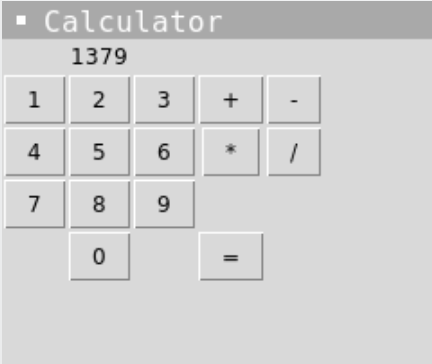

### 💡 Hints
- Use a grid to lay out the buttons.
- Create a `buttonChoice` subroutine or similar that takes in the value of the numeric button clicked, casts it to an int, and displays it in the label.
- Create an `operatorChoice` subroutine that selects which operator to display and use.
- Investigate the `lambda` command for your buttons.
- Use a `calc` subroutine with global variables for `answer`, `lastnumber`, and `operator`.



In [7]:
import tkinter as tk

# Initialize the main window
window = tk.Tk()
window.title("Calculator")
window.geometry("400x200")

# Global variables to store the current answer, last number, operator, and full expression
answer = ""
last_number = 0
operator = None
expression = ""

def type_answer(value):
    """
    Append the pressed number to the current answer and update the display.
    """
    global answer, expression
    answer += str(value)
    expression += str(value)
    hello["text"] = expression

def calc_answer(this_op):
    """
    Store the current answer and operator, then reset the answer for the next input.
    """
    global answer, last_number, operator, expression
    last_number = float(answer)  # Use float to handle decimal numbers
    answer = ""
    operator = this_op
    expression += f" {this_op} "
    hello["text"] = expression

def calc():
    """
    Perform the calculation based on the stored operator and update the display.
    """
    global answer, last_number, operator, expression
    current_number = float(answer)  # Use float to handle decimal numbers
    if operator == "+":
        total = last_number + current_number
    elif operator == "-":
        total = last_number - current_number
    elif operator == "*":
        total = last_number * current_number
    elif operator == "/":
        total = last_number / current_number
    answer = f"{total:.2f}"  # Round the result to 2 decimal places
    expression = answer
    hello["text"] = expression

def clear():
    """
    Clear the current answer and reset the display.
    """
    global answer, last_number, operator, expression
    answer = ""
    last_number = 0
    operator = None
    expression = ""
    hello["text"] = expression

# Create the display label
hello = tk.Label(text=answer, font=("Arial", 24))
hello.grid(row=0, column=0, columnspan=4, sticky="nsew")

# Create number buttons
buttons = [
    ('1', 1, 0), ('2', 1, 1), ('3', 1, 2),
    ('4', 2, 0), ('5', 2, 1), ('6', 2, 2),
    ('7', 3, 0), ('8', 3, 1), ('9', 3, 2),
    ('0', 4, 1)
]

for (text, row, col) in buttons:
    tk.Button(window, text=text, command=lambda t=text: type_answer(t), font=("Arial", 18)).grid(row=row, column=col, sticky="nsew")

# Create operator buttons
operators = [
    ('+', 1, 3), ('-', 2, 3),
    ('*', 3, 3), ('/', 4, 3),
    ('=', 4, 2), ('C', 4, 0)
]

for (text, row, col) in operators:
    if text == '=':
        tk.Button(window, text=text, command=calc, font=("Arial", 18)).grid(row=row, column=col, sticky="nsew")
    elif text == 'C':
        tk.Button(window, text=text, command=clear, font=("Arial", 18)).grid(row=row, column=col, sticky="nsew")
    else:
        tk.Button(window, text=text, command=lambda t=text: calc_answer(t), font=("Arial", 18)).grid(row=row, column=col, sticky="nsew")

# Configure grid to expand
for i in range(5):
    window.grid_rowconfigure(i, weight=1)
    window.grid_columnconfigure(i, weight=1)

# Start the main loop
window.mainloop()

### 👉 Day 67 Challenge

I've provided you with a folder called "Guess Who" containing images of 4 people.

Your program should:

1. Prompt the user to input a name.
2. If the user inputs 'Charlotte', 'Gerald', 'Kate' or 'Mo', then their image should load.
3. Otherwise, an 'image not found' message should display.

#### Example:
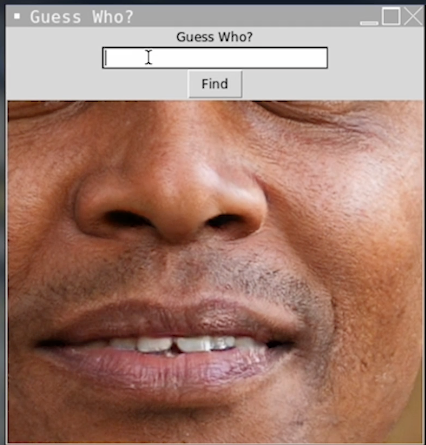

### 💡 Hints
- Pass the user input into the `newImage` variable.
- Use `try... except` to load the image or generate the error.


In [9]:
import tkinter as tk
from PIL import Image, ImageTk
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Get the base path from environment variables
BASE_PATH = os.getenv('BASE_PATH')

# Define the full path to the images directory
IMAGES_DIR = os.path.join(BASE_PATH, 'data', 'guess_who')

print(f"Looking for images in: {IMAGES_DIR}")  # Debug print to verify path

# Initialize the main window
window = tk.Tk()
window.title("Guess Who?")
window.geometry("800x600")

# Create and pack the label
hello = tk.Label(text="Guess Who?")
hello.pack()

# Create and pack the text input
text = tk.Text(window, height=1, width=30)
text.pack()

def show_image():
    person = text.get("1.0", "end").strip().lower()
    try:
        canvas.itemconfig(container, image=images[person])
        hello["text"] = f"Showing image for {person.capitalize()}"
    except KeyError:
        hello["text"] = f"Unable to find image for {person}"

# Create and pack the button
button = tk.Button(text="Find", command=show_image)
button.pack()

# Create and pack the canvas
canvas = tk.Canvas(window, width=400, height=380)
canvas.pack()

# Load images with error handling and debug prints
images = {}
for name in ['charlotte', 'gerald', 'katie', 'mo']:
    try:
        image_path = os.path.join(IMAGES_DIR, f"{name}.jpg")
        print(f"Attempting to load: {image_path}")  # Debug print
        if os.path.exists(image_path):
            # Open and resize image
            original_image = Image.open(image_path)
            # Resize image while maintaining aspect ratio
            original_image.thumbnail((400, 400))  # Max size 400x400
            images[name] = ImageTk.PhotoImage(original_image)
            print(f"Successfully loaded {name}")
        else:
            print(f"Warning: Image file not found: {image_path}")
    except Exception as e:
        print(f"Error loading image for {name}: {e}")

# Create an initial image container on the canvas
if images:
    first_image = next(iter(images.values()))
    container = canvas.create_image(200, 190, image=first_image)
    hello["text"] = "Enter a name to see their picture"
else:
    hello["text"] = "No images found in the images directory"
    print(f"No images were loaded from {IMAGES_DIR}")  # Debug print

# Start the main loop
window.mainloop()

Looking for images in: C:/Users/usuar/Documents/Data analyst IronHack/Test projects/100_days_of_Code_Replit\data\guess_who
Attempting to load: C:/Users/usuar/Documents/Data analyst IronHack/Test projects/100_days_of_Code_Replit\data\guess_who\charlotte.jpg
Successfully loaded charlotte
Attempting to load: C:/Users/usuar/Documents/Data analyst IronHack/Test projects/100_days_of_Code_Replit\data\guess_who\gerald.jpg
Successfully loaded gerald
Attempting to load: C:/Users/usuar/Documents/Data analyst IronHack/Test projects/100_days_of_Code_Replit\data\guess_who\katie.jpg
Successfully loaded katie
Attempting to load: C:/Users/usuar/Documents/Data analyst IronHack/Test projects/100_days_of_Code_Replit\data\guess_who\mo.jpg
Successfully loaded mo


### 👉 Day 68 Challenge

For today's challenge, you need your code from Day 67.

1. Start the program with no image displayed.
2. If the user inputs a name that can't be found, a new label should appear in the image location saying 'Unable to find image'.

🧠 **Extra points** for getting all the inputs with just one `input` command and the `split` function.

#### Example:
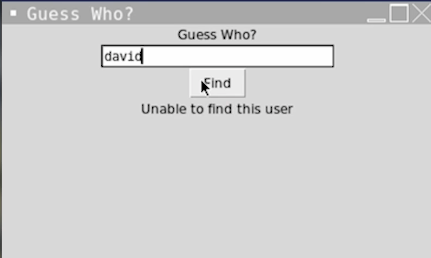

### 💡 Hints
- Create the error label in the main program. Just don't pack it so it doesn't show.
- If the image can't be found, hide the canvas and pack the error label.


In [4]:
import tkinter as tk
from PIL import Image, ImageTk
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Get the base path from environment variables
BASE_PATH = os.getenv('BASE_PATH')

# Define the full path to the images directory
IMAGES_DIR = os.path.join(BASE_PATH, 'data', 'guess_who')

print(f"Looking for images in: {IMAGES_DIR}")

# Initialize the main window with larger size
window = tk.Tk()
window.title("Guess Who?")
window.geometry("800x600")  # Made window bigger

# Create and pack the label
hello = tk.Label(text="Guess Who?", font=("Arial", 24))  # Made text bigger
hello.pack(pady=10)  # Added padding

# Create and pack the text input
text = tk.Text(window, height=1, width=30, font=("Arial", 12))  # Made text bigger
text.pack(pady=10)  # Added padding

def show_image(event=None):
    person = text.get("1.0", "end").strip().lower()
    text.delete("1.0", "end")
    try:
        canvas.itemconfig(container, image=images[person])
        hello["text"] = f"Showing image for {person.capitalize()}"
    except KeyError:
        hello["text"] = f"Unable to find image for {person}"

# Bind Enter key to show_image function
text.bind('<Return>', show_image)

# Create and pack the button
button = tk.Button(text="Find", command=show_image, font=("Arial", 12))  # Made button bigger
button.pack(pady=10)  # Added padding

# Create and pack the canvas with larger size
canvas = tk.Canvas(window, width=600, height=400)  # Made canvas bigger
canvas.pack(pady=10)  # Added padding

# Load and resize images
images = {}
for name in ['charlotte', 'gerald', 'katie', 'mo']:
    try:
        image_path = os.path.join(IMAGES_DIR, f"{name}.jpg")
        print(f"Attempting to load: {image_path}")
        if os.path.exists(image_path):
            # Open and resize image
            original_image = Image.open(image_path)
            # Resize image while maintaining aspect ratio
            original_image.thumbnail((400, 400))  # Max size 400x400
            images[name] = ImageTk.PhotoImage(original_image)
            print(f"Successfully loaded {name}")
        else:
            print(f"Warning: Image file not found: {image_path}")
    except Exception as e:
        print(f"Error loading image for {name}: {e}")

# Create an initial image container on the canvas
if images:
    first_image = next(iter(images.values()))
    container = canvas.create_image(300, 200, image=first_image)  # Centered in larger canvas
    hello["text"] = "Enter a name to see their picture"
else:
    hello["text"] = "No images found in the images directory"
    print(f"No images were loaded from {IMAGES_DIR}")

# Store images as a window attribute to prevent garbage collection
window.images = images

# Start the main loop
window.mainloop()

Looking for images in: C:/Users/usuar/Documents/Data analyst IronHack/Test projects/100_days_of_Code_Replit\data\guess_who
Attempting to load: C:/Users/usuar/Documents/Data analyst IronHack/Test projects/100_days_of_Code_Replit\data\guess_who\charlotte.jpg
Successfully loaded charlotte
Attempting to load: C:/Users/usuar/Documents/Data analyst IronHack/Test projects/100_days_of_Code_Replit\data\guess_who\gerald.jpg
Successfully loaded gerald
Attempting to load: C:/Users/usuar/Documents/Data analyst IronHack/Test projects/100_days_of_Code_Replit\data\guess_who\katie.jpg
Successfully loaded katie
Attempting to load: C:/Users/usuar/Documents/Data analyst IronHack/Test projects/100_days_of_Code_Replit\data\guess_who\mo.jpg
Successfully loaded mo


## 🧠 Day 69 Challenge

Today's challenge is to create your own visual novel. This is a type of 'choose your own adventure' video game that will show images and a bit of text and let you make decisions that influence what will be displayed next.

### Your program should:
1. Start with a picture, short text introduction, and two options.
2. Allow the user to click buttons to choose their option.
3. Display the correct branch, story image & text, and further option buttons based on their choice.
4. From one branch, both of the second options should lead to the same unhappy ending (not nice, but it'll save you time).
5. The ending should be an image, some text, and a 'start again' button that takes you back to page 1.
6. The second branch should have two options: one that leads to a good ending, and one to a bad. Both of these should also have a 'start again' button.

### Example:
Your visual novel might look something like this:
1. Page 1: Image, short introduction, and two buttons: "Explore the forest" or "Enter the cave."
2. Page 2: Depending on your choice, show the next story branch with an image and text. Provide two new options for each branch.
3. Endings: Conclude the story with a unique image, some text, and a 'start again' button for replayability.

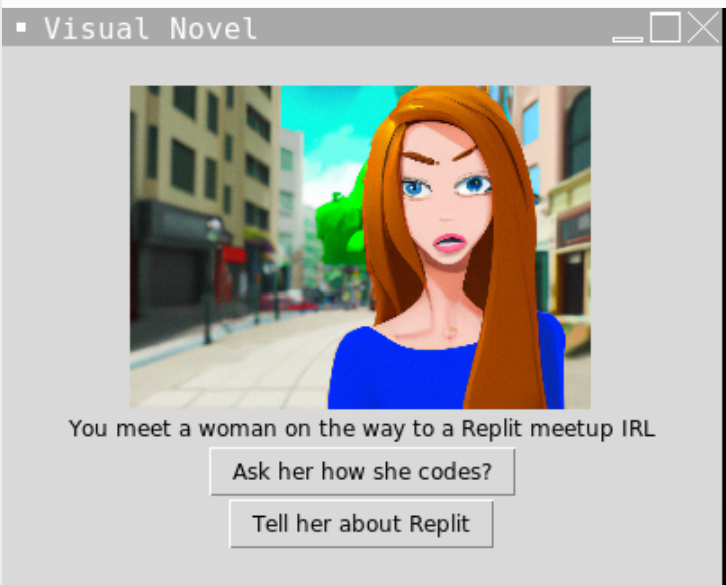
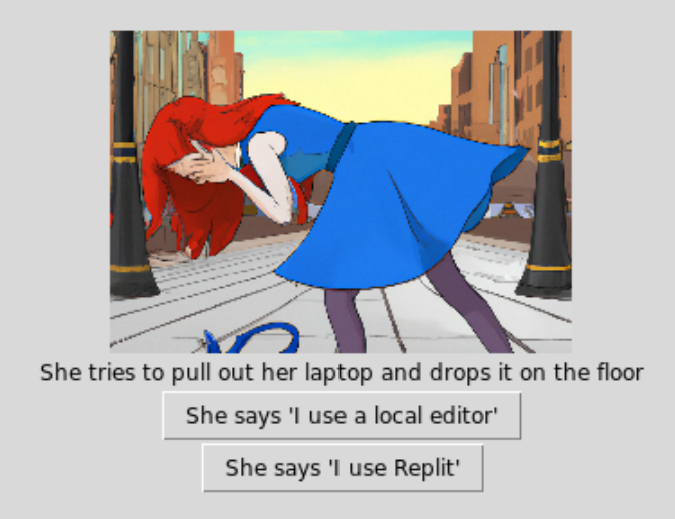
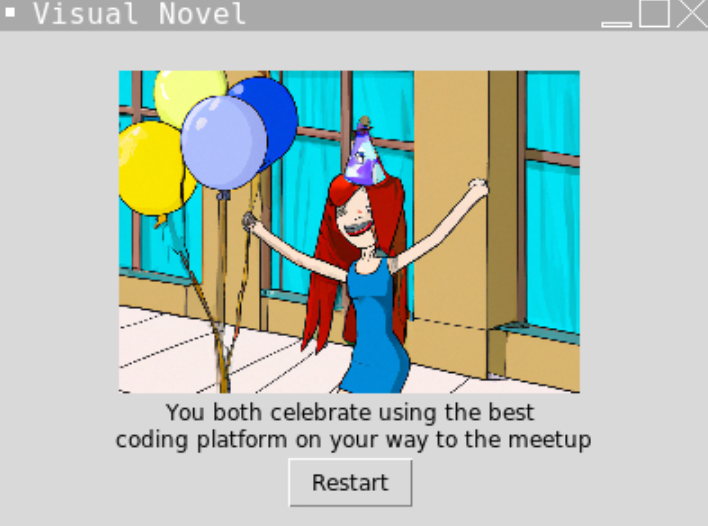

### 💡 Hints
- Nothing big here. Just use subroutines for each of your pages and call them when necessary.
- Create all of your images and text labels in the main program, but only pack them when they should appear.
- Don't forget to unpack the other page elements that should disappear.


In [1]:
import tkinter as tk
from PIL import Image, ImageTk
from dotenv import load_dotenv
import os

# Load environment variables and set up paths
load_dotenv()
BASE_PATH = os.getenv('BASE_PATH')
IMAGES_DIR = os.path.join(BASE_PATH, 'data', 'guess_who')

# Initialize window
window = tk.Tk()
window.title("Visual Novel")
window.geometry("800x600")

def load_image(filename, size=(400, 300)):
    """Load and resize an image"""
    try:
        image_path = os.path.join(IMAGES_DIR, filename)
        image = Image.open(image_path)
        image = image.resize(size)
        return ImageTk.PhotoImage(image)
    except Exception as e:
        print(f"Failed to load image {filename}: {e}")
        return None

def update_page(image, text, *buttons_to_show):
    """Update the page with new image, text and buttons"""
    if image:
        canvas.itemconfig(image_container, image=image)
        canvas.image = image  # Keep a reference
    
    story_label.config(text=text)
    
    # Hide all buttons
    for button in [choice1_btn, choice2_btn, restart_btn]:
        button.pack_forget()
    
    # Show specified buttons
    for button in buttons_to_show:
        button.pack(pady=5)

def start_story():
    """Initialize or restart the story"""
    update_page(
        images['charlotte'],
        "You meet someone on the way to a Replit meetup IRL.\nWhat do you do?",
        choice1_btn,
        choice2_btn
    )
    choice1_btn.config(text="Ask how they code", command=ask_coding)
    choice2_btn.config(text="Tell them about Replit", command=tell_replit)

def ask_coding():
    """First branch - asking about coding"""
    update_page(
        images['gerald'],
        "They try to pull out their laptop and drop it on the floor!",
        choice1_btn,
        choice2_btn
    )
    choice1_btn.config(text="They use a local editor", command=local_editor)
    choice2_btn.config(text="They use Replit", command=uses_replit)

def tell_replit():
    """Second branch - telling about Replit"""
    update_page(
        images['katie'],
        "Why I use Replit of course, like every sane individual!",
        choice1_btn,
        choice2_btn
    )
    choice1_btn.config(text="Say 'I use Replit too!'", command=replit_too)
    choice2_btn.config(text="Mention 100 days of code", command=days_of_code)

def local_editor():
    """Bad ending - local editor"""
    update_page(
        images['mo'],
        "They spend two hours loading up a code editor\nand getting it working, you wait politely...",
        restart_btn
    )

def uses_replit():
    """Good ending - uses Replit"""
    update_page(
        images['katie'],
        "You both celebrate using the best\ncoding platform on your way to the meetup!",
        restart_btn
    )

def replit_too():
    """Good ending - both use Replit"""
    update_page(
        images['charlotte'],
        "They tell you all about their coding journey!",
        restart_btn
    )

def days_of_code():
    """Best ending - 100 days of code"""
    update_page(
        images['katie'],
        "You both celebrate using Replit\nand talk about 100 days of code!",
        restart_btn
    )

# Create GUI elements
canvas = tk.Canvas(window, width=400, height=300)
canvas.pack(pady=20)

# Load images
images = {}
for name in ['charlotte', 'gerald', 'katie', 'mo']:
    images[name] = load_image(f"{name}.jpg")

# Create image container
image_container = canvas.create_image(200, 150, image=images['charlotte'])

# Create text label
story_label = tk.Label(window, text="", wraplength=600, font=("Arial", 14))
story_label.pack(pady=20)

# Create buttons
choice1_btn = tk.Button(window, text="Choice 1", font=("Arial", 12))
choice2_btn = tk.Button(window, text="Choice 2", font=("Arial", 12))
restart_btn = tk.Button(window, text="Start Again", command=start_story, font=("Arial", 12))

# Start the story
start_story()

# Start the main loop
window.mainloop()

### 👉 Day 70 Challenge

Build a login system for two types of users.

Your program should:

1. Have two types of user - **admin** and **normal**. Each should have their own username and password.
2. The admin user should be greeted with *'Hello admin'*.
3. The normal user should be greeted with *'Hello normie'*.

#### Example:

🌟 **Login System** 🌟
```
🌟Login System🌟

Username > admin01

Password > thepowerTHEPOWER

Hello admin
```

### Hints:
-You'll need 4 secrets.

In [ ]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

def authenticate_user():
    """
    Authenticate the user by checking the provided username and password
    against the environment variables.
    """
    admin_username = os.getenv('adminUsername')
    admin_password = os.getenv('adminPassword')
    user_username = os.getenv('username')
    user_password = os.getenv('userPassword')

    while True:
        username = input("Username (or type 'exit' to quit): ")
        if username.lower() == 'exit':
            print("Exiting...")
            break

        password = input("Password: ")
        
        # Check if the provided credentials match the admin credentials
        if username == admin_username and password == admin_password:
            print("Welcome Admin")
            break
        # Check if the provided credentials match the normal user credentials
        elif username == user_username and password == user_password:
            print("Welcome Normy")
            break
        else:
            print("Try again")

# Run the authentication function
if __name__ == "__main__":
    authenticate_user()

Try again
Welcome Admin
